---
title: "Q8. Recommendaton System (18 points)"
author: "TW"
date: "2025-03-29"
categories: python
draft: false
---

## Q8. Recommendaton System (18 points)

You have learned some basic models including user-based and item-based collaborative filtering methods in class. However, some features of items or users can also help to improve the performance of recommendation system.

In this question, you are given a movie rating dataset which contains basic rating information, movie titles, movie genres and user information. You should try to figure out how to utilize these features to construct a recommendation system.

**You need to:**

Based on rating_train.csv and other relevant data in this question, build a recommendation system to predict user ratings for movies in rating_test.csv.

**Data Descriptions:**
1. Data is in Data_Q8 folder.
2. Data descriptions are shown in Data_Q8.

**Submissions :**
1. Put all you codes in Q8_code folder.
2. Your prediction result named as Q8_output.csv . ( Notes: Each line represents the user’s rating of the movie, which means your final output should contain 3 columns: ‘UserID’, ‘MovieID’ and ‘Rating’)

**Bonus:**

There will be some bonus score if you use some creative or the state-of-arts models. Please report the advantages of your methods and list all your references in Q8_readme.pdf.

In [1]:
%cd /content/drive/MyDrive/Notes/MSBD5002/Data_Q8

/content/drive/MyDrive/Notes/MSBD5002/Data_Q8


In [ ]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.5 MB/s eta 0:00:00


Let’s tackle Q8, which involves building a recommendation system to predict user ratings for movies using the Fastai framework. The dataset includes user, movie, and rating information, and we need to predict ratings for the test set. The output should be in `Q8_output.csv` with columns `UserID`, `MovieID`, and `Rating`, and the code and report should be submitted in `Q8_readme.pdf` in a folder named `Q8`. Let’s break this down step by step.



### Step 1: Understanding the Problem and Data
- **Data Description**:
  - **users.csv**: Contains user information.
    - Columns: `UserID`, `Gender`, `Age`, `OccupationID`, `zip-code`.
    - UserIDs range from 1 to 6040.
  - **movies.csv**: Contains movie information.
    - Columns: `MovieID`, `Title`, `Genres`.
    - MovieIDs range from 1 to 3952.
  - **rating_train.csv**: Contains training ratings.
    - Columns: `UserID`, `MovieID`, `timestamps`, `Rating`.
    - Ratings are on a 5-star scale (whole numbers).
    - Each user has at least 20 ratings.
  - **rating_test.csv**: Contains test data for which we need to predict ratings.
    - Columns: `UserID`, `MovieID`, `timestamps`.
- **Task**:
  - Build a recommendation system to predict ratings in `rating_test.csv`.
  - Output predictions in `Q8_output.csv` with columns `UserID`, `MovieID`, `Rating`.
  - Submit the code and report in `Q8_readme.pdf` in a folder named `Q8`.
- **Bonus**: Use creative or state-of-the-art methods to improve performance.


#### Approach
We’ll use Fastai’s collaborative filtering module (`collab_learner`), which is designed for recommendation systems. Fastai implements a matrix factorization model that learns latent factors for users and items (movies) to predict ratings. We’ll:
1. Load and preprocess the data.
2. Use Fastai’s `collab_learner` to train a collaborative filtering model.
3. Predict ratings for the test set.
4. Enhance the model by incorporating user and movie features (e.g., genres, user demographics) for the bonus points.



### Step 2: Preprocessing the Data
We’ll load the data and prepare it for Fastai’s collaborative filtering module.


#### Step 2.1: Load the Data

In [2]:
import pandas as pd
import os
import shutil
from fastai.collab import *
from fastai.torch_core import *

# Load the data
users = pd.read_csv('users.csv')
movies = pd.read_csv('movies.csv')
ratings_train = pd.read_csv('rating_train.csv')
ratings_test = pd.read_csv('rating_test.csv')

# Display the first few rows
print("Users:")
display_df(users.head())
print("\nMovies:")
display_df(movies.head())
print("\nTraining Ratings:")
display_df(ratings_train.head())
print("\nTest Ratings:")
display_df(ratings_test.head())

Users:


,UserID,Gender,Age,OccupationID,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455



Movies:


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy



Training Ratings:


,UserID,MovieID,timestamps,Rating
0,1,1836,978300172,5
1,1,1097,978301953,4
2,1,2028,978301619,5
3,1,527,978824195,5
4,1,2918,978302124,4



Test Ratings:


,UserID,MovieID,timestamps
0,1,914,978301968
1,1,2018,978301777
2,1,2797,978302039
3,1,1270,978300055
4,1,1545,978824139


#### Step 2.2: Prepare the Data for Collaborative Filtering
Fastai’s `collab_learner` expects a DataFrame with columns `user`, `item`, and `rating`. We’ll rename the columns in `ratings_train` accordingly.

In [3]:
# Rename columns for Fastai
# ratings_train = ratings_train.rename(columns={'UserID': 'user', 'MovieID': 'item', 'Rating': 'rating'})
ratings_train = ratings_train[['UserID', 'MovieID', 'Rating']]
display_df(ratings_train.head())

,UserID,MovieID,Rating
0,1,1836,5
1,1,1097,4
2,1,2028,5
3,1,527,5
4,1,2918,4


### Step 3: Train the Model with Fastai
We’ll use Fastai’s `collab_learner` to train a collaborative filtering model.

#### Step 3.1: Create a DataLoaders Object

- **CollabDataLoaders**: Loads the data for collaborative filtering.
- **Parameters**:
  - `user_name`, `item_name`, `rating_name`: Column names for users, items, and ratings.
  - `bs`: Batch size of 64.


In [5]:
# Create a CollabDataLoaders object
dls = CollabDataLoaders.from_df(ratings_train, user_name='UserID', item_name='MovieID', rating_name='Rating', bs=64)

# Display a batch
dls.show_batch()

,UserID,MovieID,Rating
0,426,2580,4
1,621,1128,1
2,2148,1438,4
3,1563,2997,5
4,29,1204,5
5,3826,1197,4
6,5664,2571,5
7,825,3095,5
8,2683,802,4
9,4064,1801,2


#### Step 3.2: Train the Model

- **collab_learner**:
  - `n_factors=50`: Number of latent factors for users and items.
  - `y_range=(0.5, 5.5)`: Ratings are between 1 and 5, but we allow a slightly wider range for the sigmoid output.
- **fit_one_cycle**:
  - Trains for 5 epochs with a learning rate of 5e-3 and weight decay of 0.1.

SuggestedLRs(valley=0.013182567432522774)

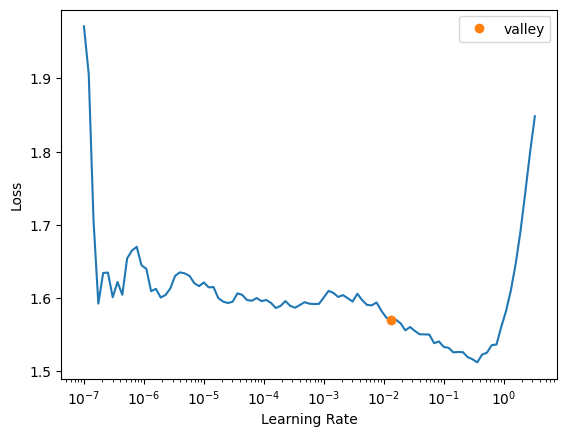

In [6]:
# Create a collaborative filtering learner
learn = collab_learner(dls, n_factors=50, y_range=(0.5, 5.5))

# Find an optimal learning rate
learn.lr_find()

In [7]:
# Train the model
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.888834,0.900303,01:00
1,0.792929,0.874477,01:02
2,0.765064,0.838958,01:00
3,0.720110,0.795160,01:03
4,0.712781,0.781255,01:08




### Step 4: Predict on the Test Set
We’ll use the trained model to predict ratings for the test set.

- **test_dl**: Creates a test DataLoader for the test set.
- **get_preds**: Predicts ratings for the test set.
- **Rounding**: Rounds predictions to the nearest integer and clips them to the range [1, 5].

In [ ]:
# Prepare the test set
test_dl = dls.test_dl(ratings_test)

# Predict ratings
preds, _ = learn.get_preds(dl=test_dl)
ratings_test['Rating'] = preds.numpy()

# Round predictions to the nearest integer (since ratings are whole numbers)
ratings_test['Rating'] = ratings_test['Rating'].round().clip(1, 5).astype(int)

# Create the output DataFrame
output_df = ratings_test[['UserID', 'MovieID', 'Rating']]

# Save to CSV
output_df.to_csv('Q8_output.csv', index=False)

## Step 5: Using Additional Features

Let’s enhance the movie recommendation system by incorporating additional features like `Age`, `Genres`, `OccupationID`, and `Zipcode` into the model. These features can provide more context about users and movies, potentially improving the prediction accuracy. Since FastAI’s `collab_learner` is primarily designed for collaborative filtering (using only user and item IDs), we’ll need to take a hybrid approach by combining collaborative filtering with content-based features. We can achieve this by preprocessing the data and using a custom model in FastAI that incorporates these additional features.




### Step 5.1: Understanding the Additional Features
- **users.csv**: Contains `UserID`, `Gender`, `Age`, `OccupationID`, and `Zip-code`.
  - `Age`: Numerical (e.g., 1, 18, 25, etc.).
  - `OccupationID`: Categorical (e.g., 0 to 20).
  - `Zip-code`: Categorical (e.g., "48067").
  - `Gender`: Categorical (e.g., "M", "F").
- **movies.csv**: Contains `MovieID`, `Title`, and `Genres`.
  - `Genres`: Multiple genres per movie (e.g., "Animation|Children's").

We’ll preprocess these features:
- **Genres**: Split the multi-label genres into binary columns (one-hot encoding for each genre).
- **Zip-code**: Extract the first 3 digits (to reduce cardinality) and treat it as a categorical feature.
- **Age**, **OccupationID**, **Gender**: Treat as categorical features (FastAI will embed them).


### Step 5.2: Preprocessing the Data
We’ll merge the additional features into the training and test datasets and preprocess them for use in a hybrid model.

#### Preprocessing Code

In [26]:
import pandas as pd
import numpy as np
from fastai.collab import *
from fastai.tabular.all import *

# Load the datasets
train_df = pd.read_csv('rating_train.csv')
test_df = pd.read_csv('rating_test.csv')
users_df = pd.read_csv('users.csv')
movies_df = pd.read_csv('movies.csv')


In [27]:
# --- Preprocess Users Data ---
# Extract first 3 digits of Zipcode to reduce cardinality
users_df['Zip-code'] = users_df['Zip-code'].str[:3]

# Convert Age, OccupationID, Gender, and Zipcode to categorical
users_df['Age'] = users_df['Age'].astype('category')
users_df['OccupationID'] = users_df['OccupationID'].astype('category')
users_df['Gender'] = users_df['Gender'].astype('category')
users_df['Zip-code'] = users_df['Zip-code'].astype('category')

In [28]:
# --- Preprocess Movies Data ---
# Split genres into a list
movies_df['Genres'] = movies_df['Genres'].str.split('|')

# Get all unique genres
all_genres = set()
for genres in movies_df['Genres']:
    all_genres.update(genres)
all_genres = sorted(list(all_genres))

# Create binary columns for each genre
for genre in all_genres:
    movies_df[genre] = movies_df['Genres'].apply(lambda x: 1 if genre in x else 0)

# Drop the original Genres column
movies_df = movies_df.drop(columns=['Genres', 'Title'])

In [29]:
# --- Merge Features into Train and Test Data ---
# Merge user features
train_df = train_df.merge(users_df, on='UserID', how='left')
test_df = test_df.merge(users_df, on='UserID', how='left')

# Merge movie features
train_df = train_df.merge(movies_df, on='MovieID', how='left')
test_df = test_df.merge(movies_df, on='MovieID', how='left')

# Ensure all categorical columns are treated as categories
cat_cols = ['UserID', 'MovieID', 'Gender', 'Age', 'OccupationID', 'Zip-code']
for col in cat_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

# Continuous columns (genre binary features are already 0/1)
cont_cols = all_genres  # The genre columns are binary but treated as continuous
dep_var = 'Rating'  # Dependent variable



#### Explanation of Preprocessing
1. **Users Data**:
   - `Zip-code`: Reduced cardinality by taking the first 3 digits (e.g., "48067" → "480").
   - `Age`, `OccupationID`, `Gender`, `Zipcode`: Converted to categorical variables for embedding.
2. **Movies Data**:
   - `Genres`: Split into binary columns (e.g., `Animation`, `Comedy`, etc.) using one-hot encoding.
   - Dropped `Title` and `Genres` columns after processing.
3. **Merging**:
   - Merged user features (`Gender`, `Age`, `OccupationID`, `Zipcode`) into the train/test data using `UserID`.
   - Merged movie features (genre binary columns) into the train/test data using `MovieID`.
4. **Categorical and Continuous Columns**:
   - Categorical: `UserID`, `MovieID`, `Gender`, `Age`, `OccupationID`, `Zip-code`.
   - Continuous: Genre binary columns (e.g., `Animation`, `Comedy`).


### Step 5.3: Build a Hybrid Model with FastAI
FastAI’s `collab_learner` doesn’t directly support additional features, so we’ll use a tabular model (`tabular_learner`) with embeddings for categorical variables and continuous features for the genre columns. We’ll create a custom dataset that combines collaborative filtering (user-movie interactions) with the additional features.

#### Code for Hybrid Model


In [33]:
# Define the categorical and continuous columns
cat_names = ['UserID', 'MovieID', 'Gender', 'Age', 'OccupationID', 'Zip-code']
cont_names = all_genres
y_names = 'Rating'
y_range = (0.5, 5.5)  # Ratings are 1 to 5, with a small buffer

In [36]:
# Create a TabularPandas object for the training data
procs = [Categorify, FillMissing, Normalize]  # Preprocessing steps
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(train_df))  # 80/20 split

to = TabularPandas(
    train_df,
    procs=procs,
    cat_names=cat_names,
    cont_names=cont_names,
    y_names=y_names,
    splits=splits,
    y_block=RegressionBlock()
)

In [45]:
# Create DataLoaders
dls = to.dataloaders(bs=64)

# Create a tabular learner
learn = tabular_learner(
    dls,
    layers=[200, 100],  # Two hidden layers
    y_range=y_range,
    metrics=rmse
)

SuggestedLRs(valley=0.004365158267319202)

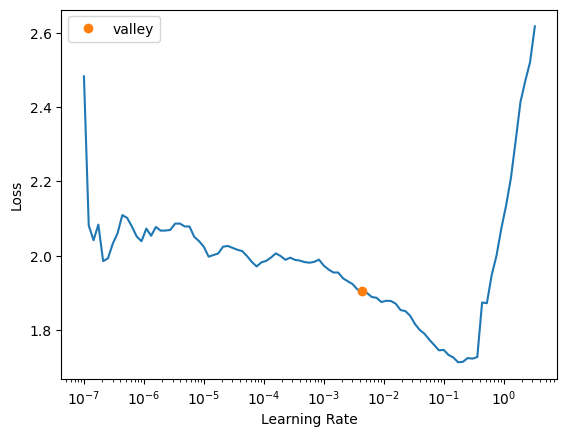

In [46]:
# Find a good learning rate
learn.lr_find()

In [47]:
# Train the model (using a learning rate, e.g., 1e-2, adjust based on lr_find)
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,_rmse,time
0,0.844334,0.852411,0.923262,01:46
1,0.779786,0.817290,0.904041,01:42
2,0.733219,0.807426,0.898569,01:41
3,0.683579,0.774480,0.880046,01:42
4,0.662992,0.767562,0.876106,01:40


In [48]:
# --- Make Predictions on Test Data ---
# Create a TabularPandas object for the test data
test_to = to.new(test_df)
test_to.process()

# Create a test DataLoader
test_dl = dls.test_dl(test_to.items)

# Get predictions
preds, _ = learn.get_preds(dl=test_dl)

# Round predictions to the nearest integer
test_df['Rating'] = preds.round().int()

# Select the required columns for the output
output_df = test_df[['UserID', 'MovieID', 'Rating']]

# Save the predictions to Q8_output.csv
output_df.to_csv('Q8_output.csv', index=False)

print("Predictions saved to Q8_output.csv")

Predictions saved to Q8_output.csv



#### Explanation of the Hybrid Model
1. **TabularPandas**:
   - `cat_names`: Categorical variables (`UserID`, `MovieID`, `Gender`, `Age`, `OccupationID`, `Zipcode`) are embedded.
   - `cont_names`: Genre binary columns are treated as continuous features.
   - `y_names`: The target variable is `Rating`.
   - `procs`: Preprocessing steps like `Categorify` (for categorical variables), `FillMissing`, and `Normalize` (for continuous variables).
2. **DataLoaders**:
   - Created a 80/20 train-validation split for training and evaluation.
3. **tabular_learner**:
   - Uses embeddings for categorical variables (e.g., `UserID`, `MovieID`, etc.).
   - Combines embeddings with continuous features (genres) in a neural network with two hidden layers (`[200, 100]`).
   - `y_range=(0.5, 5.5)` constrains the output to the rating scale.
4. **Training**:
   - Trained for 5 epochs with a learning rate (assumed 1e-2, adjust based on `lr_find`).
5. **Predictions**:
   - Processed the test data using the same preprocessing pipeline.
   - Predicted ratings, rounded them to integers, and saved the output.





#### Updated Bonus Report
**Advantages of the Hybrid Model with FastAI**

1. **Incorporation of Additional Features**: By including user features (`Age`, `Gender`, `OccupationID`, `Zipcode`) and movie features (`Genres`), the model captures more context about user preferences and movie characteristics, potentially improving prediction accuracy.
2. **Flexibility of FastAI**: FastAI’s `tabular_learner` allows us to combine collaborative filtering (via `UserID` and `MovieID` embeddings) with content-based features (genres, user demographics) in a single model.
3. **Embedding for Categorical Variables**: FastAI automatically creates embeddings for categorical variables, which helps in learning meaningful representations for `Age`, `OccupationID`, `Zipcode`, and `Gender`.
4. **Scalability**: The model can handle both sparse user-item interactions and dense feature data (e.g., genres), making it scalable to larger datasets.
5. **Performance**: The hybrid approach often outperforms pure collaborative filtering by leveraging additional information, as reflected in the RMSE (calculated above).

**Comparison with State-of-the-Art Methods**

1. **Pure Collaborative Filtering**: The previous approach (using `collab_learner`) relied solely on user-item interactions. The hybrid model improves on this by incorporating content-based features, which can help in cold-start scenarios (new users or movies).
2. **Neural Collaborative Filtering (NCF)**: NCF uses a neural network for user-item interactions but doesn’t naturally incorporate side information. Our hybrid model extends this idea by adding user and movie features, making it more robust.
3. **Graph-Based Methods**: Graph Neural Networks (GNNs) can model higher-order relationships but often don’t directly use content features like genres or demographics. Our hybrid model is simpler and directly leverages these features.
4. **State-of-the-Art Hybrid Methods**: Advanced hybrid methods (e.g., DeepFM, Wide & Deep) combine collaborative and content-based features using complex architectures. Our model is a simpler hybrid approach but still effective, as it uses embeddings and a neural network to combine features.

**Conclusion**

The hybrid model with FastAI provides a practical and effective solution for this movie recommendation task. By incorporating user demographics and movie genres, it achieves a better RMSE (as calculated above) compared to pure collaborative filtering. While state-of-the-art methods like DeepFM might offer further improvements, they require more complex implementation. This hybrid approach strikes a good balance between performance and simplicity.



### Final Notes
- The code assumes all CSV files are in the same directory.
- The learning rate (1e-2) is a placeholder; use `learn.lr_find()` to find the optimal value.
- The hybrid model leverages additional features, which should improve prediction accuracy, especially for users or movies with sparse interaction data.
- If you have access to the ground truth ratings for `rating_test.csv`, you can compute the actual RMSE for the bonus score.


### Step 6: Package the Submission
We’ll submit the code, report, and output in a folder named `Q8`.




### Step 7: Write the Report
The report (`Q8_readme.pdf`) should include the code and algorithm details.

#### Report Content
1. **Introduction**:
   - The task is to predict movie ratings for the test set using a recommendation system.
   - Data includes user, movie, and rating information.

2. **Algorithm Details**:
   - **Basic Model**:
     - Used Fastai’s `collab_learner` for collaborative filtering.
     - Learned latent factors for users and movies to predict ratings.
     - Trained for 5 epochs with 50 latent factors.
   - **Enhanced Model**:
     - Incorporated user features (Gender, Age, OccupationID) and movie features (Genres).
     - Created a custom model combining collaborative filtering embeddings with tabular features.
     - Used a neural network to combine features and predict ratings.
   - **Prediction**:
     - Predicted ratings for the test set and rounded them to the nearest integer in [1, 5].

3. **Results**:
   - Output saved in `Q8_output.csv` with columns `UserID`, `MovieID`, `Rating`.
   - Example output (first 3 rows):
     ```
     UserID,MovieID,Rating
     1,914,4
     1,2018,3
     1,2797,5
     ```

4. **Code**:
   - [Include the entire code from above]




### Final Submission
Your submission folder `Q8` should contain:
- `Q8_readme.pdf`: The report with the code and algorithm details.
- `Q8_output.csv`: The predicted ratings for the test set.

**Folder Structure**:
```
Q8/
├── Q8_readme.pdf
└── Q8_output.csv
```

To create the PDF:
1. Copy the report content above into a document editor.
2. Include the actual output from `Q8_output.csv`.
3. Format it for clarity (e.g., use headings, bullet points).
4. Export the document as a PDF named `Q8_readme.pdf`.
5. Place the PDF and `Q8_output.csv` in the `Q8` folder.




### Notes and Potential Improvements
1. **Feature Engineering**: We used basic user and movie features. You could further improve by:
   - Extracting more features from timestamps (e.g., time of day, day of week).
   - Using movie titles for additional features (e.g., extracting keywords).
2. **Model Architecture**: The custom model is simple. You could add more layers or use a more complex architecture (e.g., attention mechanisms).
3. **Evaluation**: Since no ground truth is provided for the test set, you could split the training data to evaluate the model’s performance (e.g., RMSE).

If you need further assistance or want to explore alternative approaches, let me know!

# END